In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



np.random.seed(42)

In [6]:
# Step 1: Load the Dataset
try:
    df = pd.read_csv('population_growth_dataset.csv')
except pd.errors.ParserError as e:
    print(f"Error loading CSV: {e}")
    print("Please ensure the CSV file is correctly formatted.")
    exit(1)

In [7]:
# Step 2: Exploratory Data Analysis (EDA)
# Display dataset info
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    5000 non-null   int64  
 1   Birth_Rate              5000 non-null   float64
 2   Death_Rate              5000 non-null   float64
 3   Migration_Rate          5000 non-null   float64
 4   GDP_Per_Capita          5000 non-null   float64
 5   Urbanization_Rate       5000 non-null   float64
 6   Literacy_Rate           5000 non-null   float64
 7   Life_Expectancy         5000 non-null   float64
 8   Population_Growth_Rate  5000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 351.7 KB
None

Summary Statistics:
              Year   Birth_Rate   Death_Rate  Migration_Rate  GDP_Per_Capita  \
count  5000.000000  5000.000000  5000.000000     5000.000000     5000.000000   
mean   2007.237000    24.970712    12.527743        2.44102

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Year                      0
Birth_Rate                0
Death_Rate                0
Migration_Rate            0
GDP_Per_Capita            0
Urbanization_Rate         0
Literacy_Rate             0
Life_Expectancy           0
Population_Growth_Rate    0
dtype: int64


In [10]:
# Step 3: Data Cleaning
# Handle missing values (if any)
df = df.dropna()
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


# Handle outliers in Population_Growth_Rate using IQR
q1, q3 = df['Population_Growth_Rate'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Population_Growth_Rate'] = df['Population_Growth_Rate'].clip(lower=lower_bound, upper=upper_bound)


Missing Values After Cleaning:
Year                      0
Birth_Rate                0
Death_Rate                0
Migration_Rate            0
GDP_Per_Capita            0
Urbanization_Rate         0
Literacy_Rate             0
Life_Expectancy           0
Population_Growth_Rate    0
dtype: int64


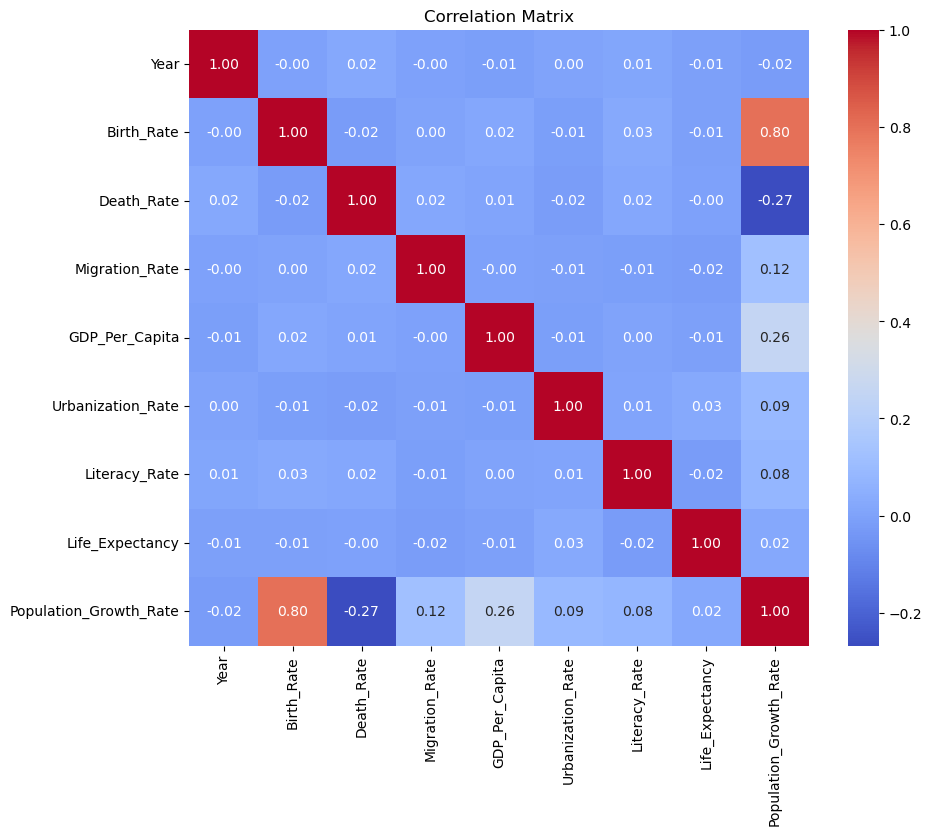

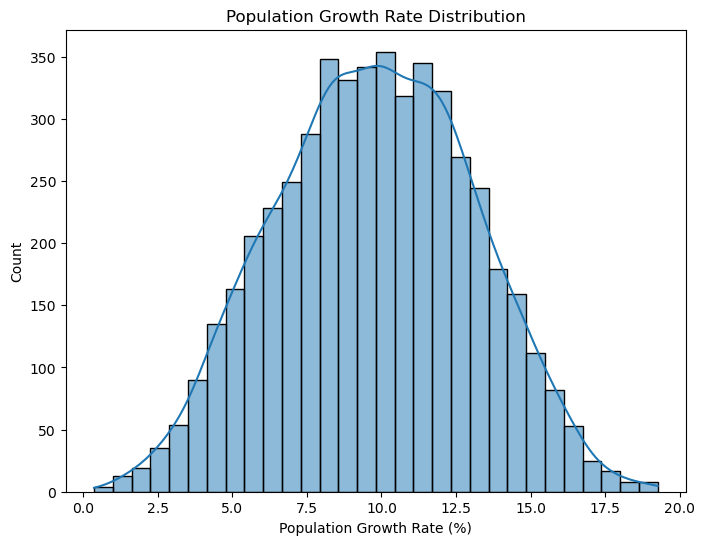

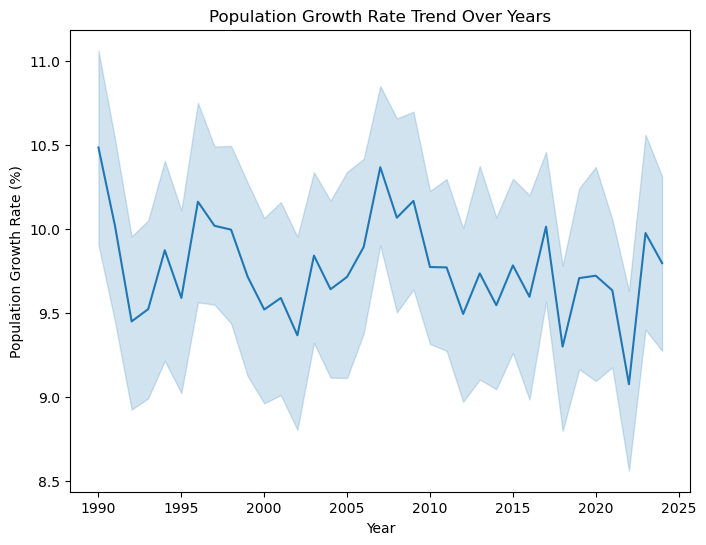

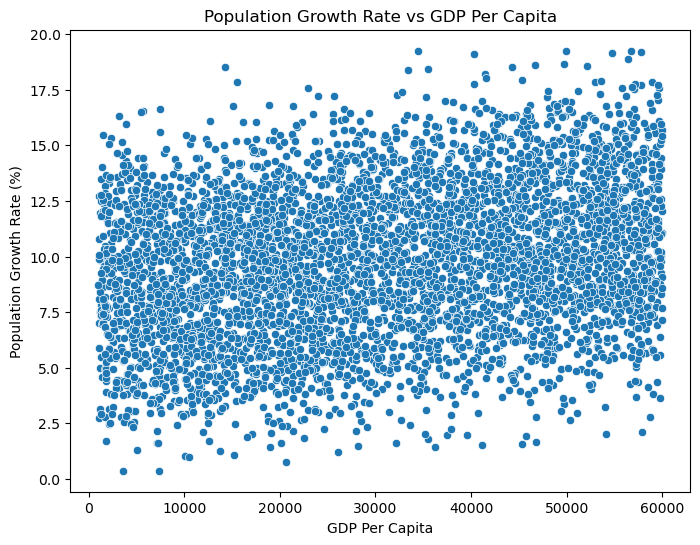

In [11]:
# Step 4: Visualizations
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Population Growth Rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Population_Growth_Rate'], bins=30, kde=True)
plt.title('Population Growth Rate Distribution')
plt.xlabel('Population Growth Rate (%)')
plt.show()

# Population Growth Rate vs Year (Trend)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Population_Growth_Rate', data=df)
plt.title('Population Growth Rate Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.show()

# Scatter Plot: Population Growth Rate vs GDP Per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP_Per_Capita', y='Population_Growth_Rate', data=df)
plt.title('Population Growth Rate vs GDP Per Capita')
plt.xlabel('GDP Per Capita')
plt.ylabel('Population Growth Rate (%)')
plt.show()

In [12]:
# Step 5: Prepare Data for Modeling
# Features (X) and target (y)
X = df.drop('Population_Growth_Rate', axis=1)
y = df['Population_Growth_Rate']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Step 6: Train Multiple Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Cross-validation score
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    results.append({
        'Model': name,
        'MSE': mse,
        'R2': r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std()
    })
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"R^2: {r2:.2f}")
    print(f"Cross-Validation R^2: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Linear Regression Results:
MSE: 2.28
R^2: 0.79
Cross-Validation R^2: 0.79 ± 0.01

Random Forest Results:
MSE: 2.58
R^2: 0.77
Cross-Validation R^2: 0.77 ± 0.01

SVR Results:
MSE: 2.49
R^2: 0.77
Cross-Validation R^2: 0.78 ± 0.01



Model Comparison:
               Model       MSE        R2  CV_R2_Mean  CV_R2_Std
0  Linear Regression  2.280354  0.793978    0.794721   0.007085
1      Random Forest  2.582787  0.766654    0.772325   0.010598
2                SVR  2.490796  0.774965    0.778469   0.008491


C:\Users\prana\AppData\Local\Temp\ipykernel_20916\2540900041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, palette=['#36A2EB', '#FF6384', '#FFCE56'])


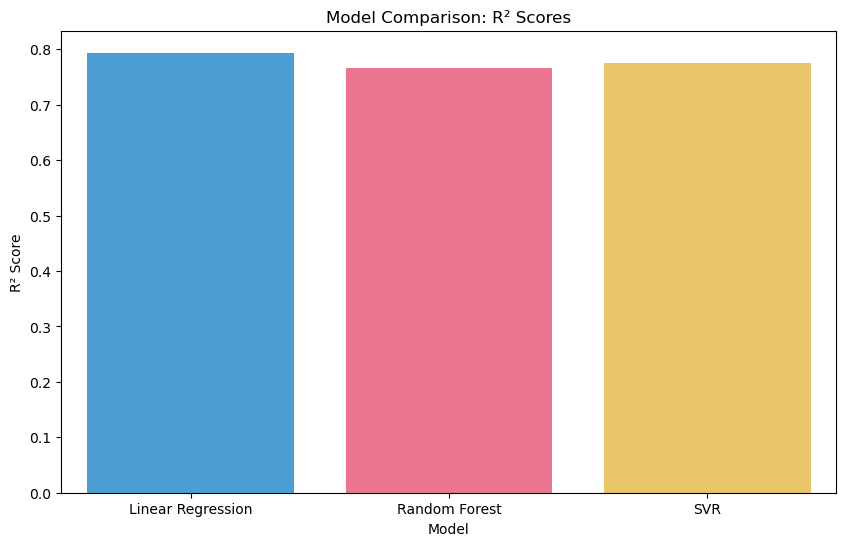

C:\Users\prana\AppData\Local\Temp\ipykernel_20916\2540900041.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette=['#36A2EB', '#FF6384', '#FFCE56'])


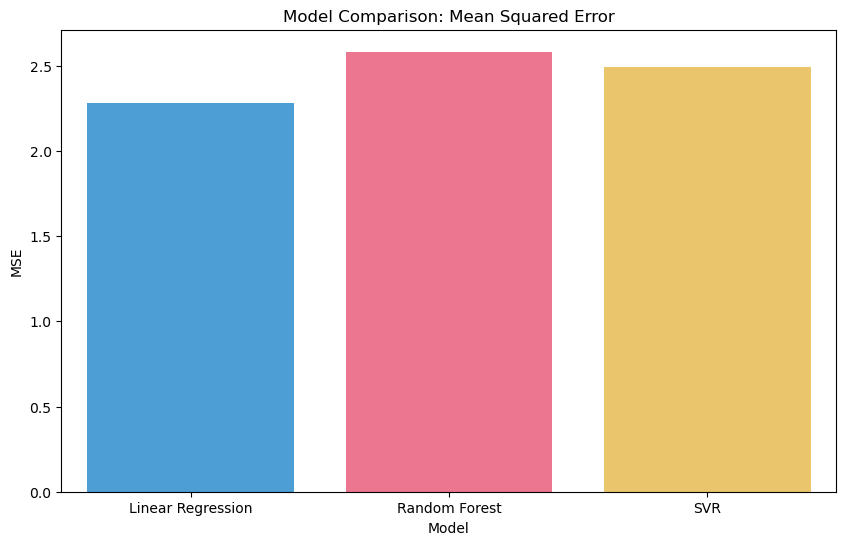

In [14]:
# Step 7: Compare Model Performance
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Static plots for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df, palette=['#36A2EB', '#FF6384', '#FFCE56'])
plt.title('Model Comparison: R² Scores')
plt.ylabel('R² Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df, palette=['#36A2EB', '#FF6384', '#FFCE56'])
plt.title('Model Comparison: Mean Squared Error')
plt.ylabel('MSE')
plt.show()

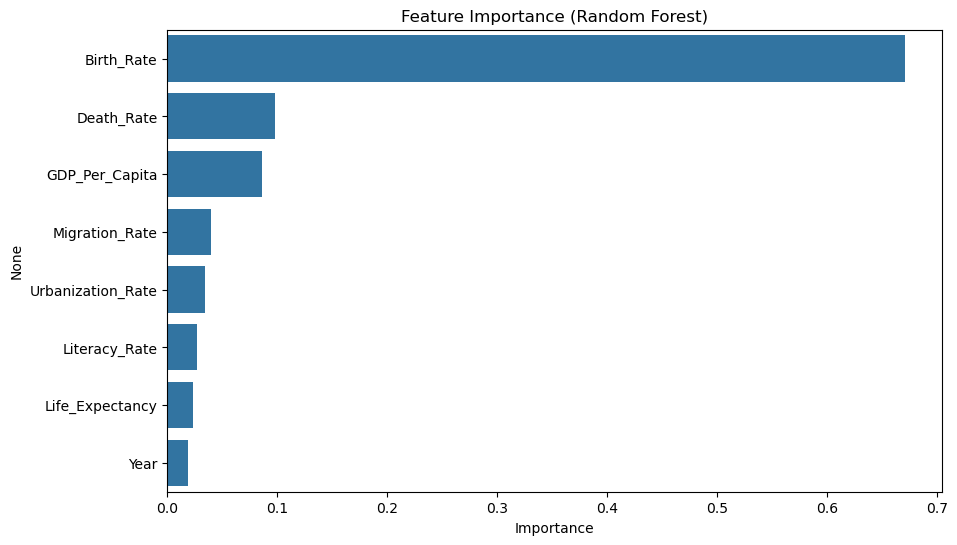

In [15]:
# Step 8: Feature Importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

In [17]:
import gradio as gr

In [18]:
def predict_population_growth(model_name, year, birth_rate, death_rate, migration_rate, gdp_per_capita, urbanization_rate, literacy_rate, life_expectancy):
    # Prepare input data
    input_data = np.array([[year, birth_rate, death_rate, migration_rate, gdp_per_capita, urbanization_rate, literacy_rate, life_expectancy]])
    input_scaled = scaler.transform(input_data)
    
    # Select model
    model = models[model_name]
    
    # Predict
    prediction = model.predict(input_scaled)[0]
    
    # Return prediction and visualizations
    return (
        f"Predicted Population Growth Rate: {prediction:.2f}%",
        "correlation_matrix.png",
        "population_growth_distribution.png",
        "population_growth_trend.png",
        "population_growth_vs_gdp.png",
        "model_comparison_r2.png",
        "model_comparison_mse.png",
        "feature_importance.png"
    )

# Define Gradio interface
iface = gr.Interface(
    fn=predict_population_growth,
    inputs=[
        gr.Dropdown(choices=['Linear Regression', 'Random Forest', 'SVR'], label="Select Model"),
        gr.Number(label="Year", value=2020),
        gr.Number(label="Birth Rate (per 1000)", value=10.0),
        gr.Number(label="Death Rate (per 1000)", value=5.0),
        gr.Number(label="Migration Rate (per 1000)", value=0.0),
        gr.Number(label="GDP Per Capita (USD)", value=10000.0),
        gr.Number(label="Urbanization Rate (%)", value=50.0),
        gr.Number(label="Literacy Rate (%)", value=90.0),
        gr.Number(label="Life Expectancy (years)", value=70.0)
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Image(label="Correlation Matrix"),
        gr.Image(label="Population Growth Rate Distribution"),
        gr.Image(label="Population Growth Trend"),
        gr.Image(label="Population Growth vs GDP"),
        gr.Image(label="Model Comparison: R² Scores"),
        gr.Image(label="Model Comparison: MSE"),
        gr.Image(label="Feature Importance (Random Forest)")
    ],
    title="Population Growth Rate Prediction",
    description="Enter values for the features and select a model to predict the population growth rate. Visualizations show dataset insights and model performance."
)

# Launch Gradio interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\prana\Downloads\minikonda\envs\tf-gpu\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
